In [4]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [5]:
data = pd.read_csv("Desktop//student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [6]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [7]:
predict = "G3"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [10]:
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)
    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

0.8545946256094947
0.7387081262395274
0.8569214488254812
0.8785602239205271
0.9351433213472072
0.8124026637499049
0.8915631298706326
0.8172289207966107
0.8525432167448976
0.8767882830437049
0.8283475673793558
0.8508814966296929
0.8620030302032637
0.8443615370725516
0.7424177440841087
0.8067179921238142
0.8219522251123184
0.8690904417128215
0.7455964141229806
0.8394301518626124
0.8184032007755813
0.8708070599869752
0.7926779614204533
0.745443892371656
0.9475207730273171
0.8794968503925917
0.9109006176948163
0.7893425933833236
0.7963116503887366
0.803656138351632


In [11]:
print(best)
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)
print("coefficient \n", linear.coef_)
print("intercept \n", linear.intercept_)
prediction = linear.predict(x_test)
for x in range(len(prediction)):
    print(prediction[x], x_test[x], y_test[x])

0.9475207730273171
coefficient 
 [ 0.15511408  0.98582292 -0.17556781 -0.25888033  0.04183826]
intercept 
 -1.6799689225812937
12.645962292958789 [12 13  2  0  0] 13
5.696574076110089 [7 7 2 1 0] 0
11.341696451580411 [10 12  3  0  4] 12
16.214741788495672 [14 16  1  0  3] 16
5.800340331768838 [6 7 2 0 0] 0
14.793175936878734 [12 15  1  0  0] 15
14.431833523163418 [15 14  2  0  8] 14
9.019642994204439 [10 10  3  2  8] 10
10.447764826397894 [10 11  2  0  2] 11
5.605046784124539 [7 7 2 2 4] 9
8.015528953224942 [ 6  9  1  2 14] 8
8.747602289693399 [9 9 1 0 8] 10
7.0963914026321415 [8 8 2 0 0] 9
15.011512800524526 [14 15  2  0  2] 15
3.439178016393168 [3 5 2 1 8] 5
14.15213545695281 [16 14  4  0  6] 15
11.021261506241641 [11 11  2  0 12] 11
6.030916159087829 [7 7 3 0 6] 7
11.903318166782906 [12 12  2  1 12] 13
12.327883366812369 [10 13  2  1  6] 13
10.686555424231958 [11 11  2  0  4] 11
9.931308335350934 [12 10  3  0 10] 12
6.931061150597799 [10  8  1  3  3] 7
-1.028618525770093 [7 0 1 1 0]

Text(0, 0.5, 'final Grades')

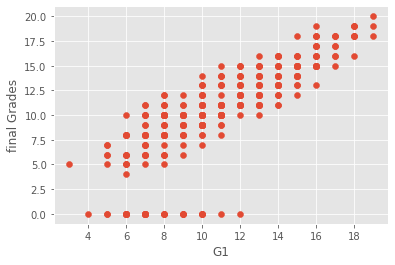

In [12]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("final Grades")